In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd


In [ ]:
data=pd.read_csv("/content/kc_house_data.csv")

In [ ]:
data=data.drop(['id','date'],axis=1)

In [ ]:
from tensorflow.keras.datasets import california_housing
(X_train,Y_train),(X_test,Y_test)=california_housing.load_data()
print(X_train.shape,Y_train.shape)

(16512, 8) (16512,)


In [ ]:
!pip install tensorflow.keras

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1) # Output layer for regression
    ])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(
    X_train,Y_train,
    validation_split=0.2,
    epochs = 50,
    batch_size = 32,
    verbose = 1
    )

Epoch 1/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 42327261184.0000 - mae: 168986.6562 - val_loss: 27050967040.0000 - val_mae: 118719.8672
Epoch 2/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 24635707392.0000 - mae: 113152.8828 - val_loss: 23271374848.0000 - val_mae: 108591.8438
Epoch 3/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 21037240320.0000 - mae: 104201.8438 - val_loss: 17248008192.0000 - val_mae: 94438.9766
Epoch 4/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15359143936.0000 - mae: 90277.2812 - val_loss: 12524129280.0000 - val_mae: 84954.1016
Epoch 5/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11726607360.0000 - mae: 83313.7344 - val_loss: 11402595328.0000 - val_mae: 83472.1719
Epoch 6/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11136474112.0000 - mae: 82441.4453 - val_loss: 11172144128.0000 - val_mae: 83310.8203
Epoch 7/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11049283584.0000 - mae: 82345.4609 - val_loss: 10986662912.

In [ ]:
model.compile(
     optimizer='adam', # Optimization algorithm
     loss='mse', # Mean Squared Error for regression
     metrics=['mae'] # Mean Absolute Error as an additional metric
     )

In [ ]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
from sklearn.model_selection import train_test_split

# Features aur target define karo
X = data.drop('price', axis=1)
y = data['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)



In [ ]:
model = keras.Sequential([
    layers.Dense(128, activation='relu',  input_shape=(X_train.shape[1],)),
    layers.Dense(64,activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1) # regression output
    ])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(
    X,y,
    validation_split=0.2,
    epochs = 50,
    batch_size = 32,
    verbose = 1
    )

Epoch 1/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 215679287296.0000 - mae: 310260.0312 - val_loss: 117382529024.0000 - val_mae: 201578.0156
Epoch 2/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 84438933504.0000 - mae: 184909.0156 - val_loss: 67471785984.0000 - val_mae: 174038.2500
Epoch 3/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 61850198016.0000 - mae: 165428.1562 - val_loss: 71134937088.0000 - val_mae: 180342.2188
Epoch 4/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 55891312640.0000 - mae: 160267.4062 - val_loss: 66814627840.0000 - val_mae: 167600.5156
Epoch 5/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 53546340352.0000 - mae: 156559.8281 - val_loss: 68882784256.0000 - val_mae: 178094.1250
Epoch 6/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 55794659328.0000 - mae: 158510.0156 - val_loss: 65969176576.0000 - val_mae: 168580.2188
Epoch 7/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 56192516096.0000 - mae: 158082.6875 - val_loss: 70

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [ ]:
X,y = make_blobs(
    n_samples=35000,
    centers = 2,
    n_features=2,
    cluster_std=2.0,
    random_state=42
)

In [ ]:
model = keras.Sequential([
    layers.Dense(16,activation='relu',input_shape = (2,)),
    layers.Dense(8,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
data=pd.read_csv('/content/advertising.csv')
X=data.drop("Clicked on Ad",axis=1)
y=data["Clicked on Ad"]
scaler = StandardScaler()
X = scaler.fit_transform(X)
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.summary()
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=8,
    restore_best_weights=True
)
history = model.fit(
    X, y,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 737 (2.88 KB)

 Trainable params: 737 (2.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6037 - loss: 0.6654 - val_accuracy: 0.9250 - val_loss: 0.5356
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7587 - loss: 0.5553 - val_accuracy: 0.9500 - val_loss: 0.4242
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8840 - loss: 0.4359 - val_accuracy: 0.9550 - val_loss: 0.3233
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9013 - loss: 0.3526 - val_accuracy: 0.9550 - val_loss: 0.2433
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9541 - loss: 0.2554 - val_accuracy: 0.9550 - val_loss: 0.1898
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9513 - loss: 0.2182 - val_accuracy: 0.9550 - val_loss: 0.1624
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9362 - loss: 0.1867 - val_accuracy: 0.9550 - val_loss: 0.1483
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9497 - loss: 0.1782 - val_accuracy: 0.9550 - v

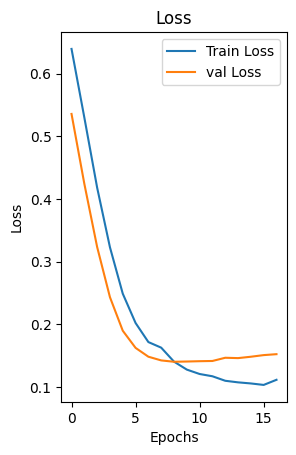

In [ ]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

In [ ]:
!pip install gensim


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 22.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec

In [ ]:
df=pd.read_csv('/content/sentiment_dataset_500_samples.csv')

In [ ]:
X = df["text"].values
y = df["sentiment"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
vocab_size = 5000
max_length = 20


In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

In [ ]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq,
                            maxlen=max_length,
                            padding='post')
X_test_pad = pad_sequences(X_test_seq,
                           maxlen=max_length,
                           padding='post')

In [ ]:
# Convert sentences into token lists
sentences = [sentence.lower().split() for sentence in X_train]

w2v_model = Word2Vec(
    sentences,
    vector_size=100,
    min_count=1,
    epochs=100
)

In [ ]:
embedding_dim = 100
word_index = tokenizer.word_index

embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in word_index.items():
    if i < vocab_size:
        if word in w2v_model.wv:
            embedding_matrix[i] = w2v_model.wv[word]

In [ ]:
model = keras.Sequential([
    layers.Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        weights=[embedding_matrix],
        input_length=max_length,
        trainable=False   # Freeze pretrained vectors
    ),
    layers.LSTM(64),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │       500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 500,000 (1.91 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 500,000 (1.91 MB)

In [ ]:
history = model.fit(
    X_train_pad, y_train,
    epochs=15,
    batch_size=4,
    validation_split=0.2,
    verbose=1
)

Epoch 1/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.5433 - loss: 0.6924 - val_accuracy: 0.3625 - val_loss: 0.7013
Epoch 2/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5260 - loss: 0.6881 - val_accuracy: 0.4000 - val_loss: 0.7291
Epoch 3/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5878 - loss: 0.6727 - val_accuracy: 0.5125 - val_loss: 0.6986
Epoch 4/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6337 - loss: 0.6456 - val_accuracy: 0.4375 - val_loss: 0.7795
Epoch 5/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5715 - loss: 0.6462 - val_accuracy: 0.6125 - val_loss: 0.6939
Epoch 6/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6553 - loss: 0.6005 - val_accuracy: 0.6250 - val_loss: 0.6535
Epoch 7/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6598 - loss: 0.6118 - val_accuracy: 0.7000 - val_loss: 0.6455
Epoch 8/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7029 - loss: 0.5983 - val_accuracy: 0.6000 - val_l

In [ ]:
new_text = ["The service was really amazing"]

new_seq = tokenizer.texts_to_sequences(new_text)
new_pad = pad_sequences(new_seq, maxlen=max_length, padding='post')

prob = model.predict(new_pad)[0][0]
sentiment = "Positive" if prob >= 0.5 else "Negative"

print("Prediction probability:", prob)
print("Predicted sentiment:", sentiment)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 666ms/step
Prediction probability: 0.6867504
Predicted sentiment: Positive


In [ ]:
history = model.fit(
    X_train_pad, y_train,
    epochs=15,
    batch_size=4,
    validation_split=0.2,
    verbose=1
)

Epoch 1/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.7272 - loss: 0.5253 - val_accuracy: 0.6000 - val_loss: 0.6421
Epoch 2/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6940 - loss: 0.5396 - val_accuracy: 0.6250 - val_loss: 0.6237
Epoch 3/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7086 - loss: 0.5347 - val_accuracy: 0.6500 - val_loss: 0.5560
Epoch 4/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7350 - loss: 0.5392 - val_accuracy: 0.6125 - val_loss: 0.6270
Epoch 5/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7029 - loss: 0.6014 - val_accuracy: 0.7125 - val_loss: 0.6362
Epoch 6/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7280 - loss: 0.5306 - val_accuracy: 0.7125 - val_loss: 0.5890
Epoch 7/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7308 - loss: 0.5535 - val_accuracy: 0.5625 - val_loss: 0.8549
Epoch 8/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7718 - loss: 0.4577 - val_accuracy: 0.7375 - val_loss

In [ ]:
new_text = ["The service was really amazing"]

new_seq = tokenizer.texts_to_sequences(new_text)
new_pad = pad_sequences(new_seq, maxlen=max_length, padding='post')

prob = model.predict(new_pad)[0][0]
sentiment = "Positive" if prob >= 0.5 else "Negative"

print("Prediction probability:", prob)
print("Predicted sentiment:", sentiment)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Prediction probability: 0.81803805
Predicted sentiment: Positive


In [ ]:
texts = ["I love this movie", "This film was terrible", "Amazing acting", "Worst plot ever"]



In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)


In [ ]:
max_length = 100
all_padded = pad_sequences(sequences, maxlen=max_length, padding='post')


In [ ]:
predictions = model.predict(all_padded).flatten()
df['prediction_prob'] = predictions
df['prediction'] = (predictions >= 0.5).astype(int)
df.head()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


ValueError: Length of values (4) does not match length of index (500)

In [ ]:
df

,text,sentiment
0,The experience was pleasant,1
1,The quality is poor,0
2,The quality is excellent,1
3,This exceeded my expectations,1
4,Slow delivery and bad service,0
...,...,...
495,This did not meet my expectations,0
496,Slow delivery and bad service,0
497,The staff was rude,0
498,I hate this product,0


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
text_data = """
deep learning is powerful
deep learning is interesting
deep learning builds neural networks
neural networks learn patterns
transformers are powerful models
transformers learn language patterns
"""

In [ ]:
def clean_text(text):
  text=text.lower()
  text=re.sub(r'[^a-z\s]','',text)
  return text
text_data=clean_text(text_data)
print(text_data)

NameError: name 're' is not defined

In [ ]:
%pip install langchain langchain-community langchain-huggingface \
sentence-transformers faiss-cpu transformers pypdf gradio


INFO: pip is looking at multiple versions of transformers to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.8/23.8 MB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.6/330.6 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 566.4/566.4 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninst

In [ ]:
from langchain_community.document_loaders import PyPDFLoader
loader = PyPDFLoader("ml_notes.pdf")
documents = loader.load()



ValueError: File path ml_notes.pdf is not a valid file or url

In [ ]:
text_data = """
deep learning is powerful
deep learning is interesting
deep learning builds neural networks
neural networks learn patterns
transformers are powerful models
transformers learn language patterns
"""

In [ ]:
import re
def clean_text(text):
  text=text.lower()
  text=re.sub(r'[^a-z\s]','',text)
  return text
text_data=clean_text(text_data)
print(text_data)


deep learning is powerful
deep learning is interesting
deep learning builds neural networks
neural networks learn patterns
transformers are powerful models
transformers learn language patterns



In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text_data])
total_words = len(tokenizer.word_index) + 1

In [ ]:
input_sequences = []

for line in text_data.split("\n"):
    token_list = tokenizer.texts_to_sequences([line])[0]

    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

max_len = max([len(seq) for seq in input_sequences])

input_sequences = np.array(
    pad_sequences(input_sequences, maxlen=max_len, padding='pre')
)


In [ ]:
X= input_sequences[:,:-1]
y=input_sequences[:,-1]

y=tf.keras.utils.to_categorical(y,
                                num_classes=total_words)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define a custom Transformer block
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [
                layers.Dense(ff_dim, activation="relu"),
                layers.Dense(embed_dim),
            ]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training=False):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

# Hyperparameters
embed_dim = 32   # embedding dimension
num_heads = 2    # number of attention heads
ff_dim = 32      # feed-forward layer size
total_words = 5000  # vocabulary size
max_len = 100      # sequence length (example)

# Model definition
inputs = layers.Input(shape=(max_len-1,))
embedding_layer = layers.Embedding(total_words, embed_dim)(inputs)

transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(embedding_layer)

x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(total_words, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

# Compile
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 99)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_2 (Embedding)         │ (None, 99, 32)         │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_block_1             │ (None, 99, 32)         │        10,656 │
│ (TransformerBlock)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 32)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5000)           │       325,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 497,768 (1.90 MB)

 Trainable params: 497,768 (1.90 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X = pad_sequences(X, maxlen=max_len-1, padding='pre')



In [ ]:
def generate_text(seed_text, next_words):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_len-1, padding='pre')

        predicted = np.argmax(model.predict(token_list), axis=-1)

        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break

        seed_text += " " + output_word
    return seed_text

In [ ]:
print(generate_text("deep learning",2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
deep learning  


In [ ]:
%pip install langchain langchain-community langchain-huggingface \
sentence-transformers faiss-cpu transformers pypdf gradio

In [ ]:
from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader("ml_notes.pdf")
documents = loader.load()



from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=300,
    chunk_overlap=50
)

docs = text_splitter.split_documents(documents)
len(docs)
from langchain_huggingface import HuggingFaceEmbeddings

embedding_model = HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2"
)

from langchain_community.vectorstores import FAISS

vectorstore = FAISS.from_documents(docs,
                                   embedding_model)
retriever = vectorstore.as_retriever(
    search_kwargs={"k": 3})

from transformers import pipeline
from langchain_huggingface import HuggingFacePipeline



from transformers import pipeline
from langchain_huggingface import HuggingFacePipeline

pipe = pipeline(
    "text2text-generation",   # ✅ correct
    model="google/flan-t5-base",
    max_new_tokens=200
)

llm = HuggingFacePipeline(pipeline=pipe)




from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain_core.output_parsers import StrOutputParser
prompt = ChatPromptTemplate.from_template(
    """
    Answer the question using ONLY the context below.
    If the answer is not in the context, say "I don't know".

    Context:
    {context}

    Question:
    {question}
    """
)
rag_chain = (
    {
        "context": retriever,
        "question": RunnablePassthrough()
    }
    | prompt
    | llm
    | StrOutputParser()
)

response = rag_chain.invoke("What is Transformers?")
print(response)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

Device set to use cpu
Token indices sequence length is longer than the specified maximum sequence length for this model (602 > 512). Running this sequence through the model will result in indexing errors


A field of AI that enables systems to learn from data.nSupervised learning uses labeled data.nUnsupervised learning finds hidden patterns.nGradient descent is an optimization algorithm.nNeural networks consist of layers of neurons.nTransformers use attention instead of recurrence.nRAG combines retrieval with generation.n


In [ ]:
response = rag_chain.invoke("What is Transformers?")
print(response)

A field of AI that enables systems to learn from data.nSupervised learning uses labeled data.nUnsupervised learning finds hidden patterns.nTransformers use attention instead of recurrence.nRAG combines retrieval with generation.n


In [ ]:
response = rag_chain.invoke("What is RAG?")
print(response)

Token indices sequence length is longer than the specified maximum sequence length for this model (597 > 512). Running this sequence through the model will result in indexing errors


combines retrieval with generation


In [ ]:
from langchain_community.document_loaders import PyPDFLoader
#Load PDF
loader = PyPDFLoader("ml_notes.pdf")
documents = loader.load()

documents[:1]

#Split text into chunks
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=200,
    chunk_overlap=30
)

docs = text_splitter.split_documents(documents)
print("Number of chunks:", len(docs))

#Create embeddings
from langchain_huggingface import HuggingFaceEmbeddings

embedding_model = HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2"
)

#Store embeddings in FAISS
from langchain_community.vectorstores import FAISS

vectorstore = FAISS.from_documents(docs, embedding_model)
retriever = vectorstore.as_retriever(search_kwargs={"k": 2})

#Load LLM (CORRECT pipeline for FLAN-T5)
from transformers import pipeline
from langchain_huggingface import HuggingFacePipeline

pipe = pipeline(
    "text2text-generation",   # ✅ correct for T5
    model="google/flan-t5-base",
    max_new_tokens=200
)

llm = HuggingFacePipeline(pipeline=pipe)

#Build RAG chain (MODERN LCEL – no deprecated APIs)
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain_core.output_parsers import StrOutputParser

prompt = ChatPromptTemplate.from_template(
    """
    Answer the question using ONLY the context below.
    If the answer is not in the context, say "I don't know".

    Context:
    {context}

    Question:
    {question}
    """
)

rag_chain = (
    {
        "context": retriever,
        "question": RunnablePassthrough()
    }
    | prompt
    | llm
    | StrOutputParser()
)



Number of chunks: 2


Device set to use cpu


In [ ]:
response = rag_chain.invoke("What is RAG?")
print(response)

combines retrieval with generation


In [ ]:
import gradio as gr

def chat(question):
    return rag_chain.invoke(question)

interface = gr.Interface(
    fn=chat,
    inputs=gr.Textbox(lines=2, placeholder="Ask from the PDF..."),
    outputs="text",
    title="📚 RAG PDF Chatbot",
    description="Ask questions grounded in your PDF using RAG"
)

interface.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://2e5734bd38b4d181b5.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
%%writefile app.py
# =========================
# RAG PDF Chatbot - app.py
# =========================

import gradio as gr

from langchain_community.document_loaders import PyPDFLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_huggingface import HuggingFaceEmbeddings, HuggingFacePipeline
from langchain_community.vectorstores import FAISS

from transformers import pipeline
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain_core.output_parsers import StrOutputParser


# --------- Load PDF ---------
PDF_PATH = "ml_notes.pdf"

loader = PyPDFLoader(PDF_PATH)
documents = loader.load()


# --------- Split Text ---------
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=200,
    chunk_overlap=30
)
docs = text_splitter.split_documents(documents)


# --------- Embeddings ---------
embedding_model = HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2"
)


# --------- Vector Store ---------
vectorstore = FAISS.from_documents(docs, embedding_model)
retriever = vectorstore.as_retriever(search_kwargs={"k": 2})


# --------- LLM (FLAN-T5) ---------
pipe = pipeline(
    "text2text-generation",
    model="google/flan-t5-base",
    max_new_tokens=200
)
llm = HuggingFacePipeline(pipeline=pipe)


# --------- Prompt ---------
prompt = ChatPromptTemplate.from_template(
    """
    Answer the question using ONLY the context below.
    If the answer is not in the context, say "I don't know".

    Context:
    {context}

    Question:
    {question}
    """
)


# --------- RAG Chain ---------
rag_chain = (
    {
        "context": retriever,
        "question": RunnablePassthrough()
    }
    | prompt
    | llm
    | StrOutputParser()
)


# --------- Gradio UI ---------
def chat(question):
    return rag_chain.invoke(question)


demo = gr.Interface(
    fn=chat,
    inputs=gr.Textbox(lines=2, placeholder="Ask from the PDF..."),
    outputs="text",
    title="📚 RAG PDF Chatbot",
    description="Ask questions grounded in your PDF using RAG"
)

demo.launch()

Writing app.py


In [ ]:
%%writefile requirements.txt
langchain
langchain-community
langchain-huggingface
langchain-text-splitters
sentence-transformers
faiss-cpu
transformers
pypdf
gradio
torch

Writing requirements.txt


In [ ]:
from google.colab import files

files.download("app.py")
files.download("requirements.txt")
files.download("ml_notes.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>